# Data import and test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../raw_data/{name_data_file}.csv", na_values=["?"])

In [3]:
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
print("Original shape:", data.shape)

# DataFrame w/o missing values and duplicates  
df_clean = data.dropna()
df_clean = df_clean.drop_duplicates()

# shape after cleaning
print("Shape after dropna:", df_clean.shape)

# dropped rows
dropped_rows = data.loc[data.index.difference(df_clean.index)]

print("\n Rows dropped:", dropped_rows.shape[0])
print("\n Head of dropped.rows:")
dropped_rows.head()

Original shape: (299, 13)
Shape after dropna: (299, 13)

 Rows dropped: 0

 Head of dropped.rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [20]:
df_clean.head(100)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58.0,1,133,0,60,1,219000.00,1.0,141,1,0,83,0
96,63.0,1,514,1,25,1,254000.00,1.3,134,1,0,83,0
97,70.0,1,59,0,60,0,255000.00,1.1,136,0,0,85,0
98,60.0,1,156,1,25,1,318000.00,1.2,137,0,0,85,0


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
print(df_clean.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [9]:
# count how many numerical and categorical variables there are
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(f"Number of numerical variables: {len(num_cols)}")
print("Numerical variables:", list(num_cols))

print(f"\nNumber of categorical variables: {len(cat_cols)}")
print("Categorical variables:", list(cat_cols))


Number of numerical variables: 13
Numerical variables: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Number of categorical variables: 0
Categorical variables: []


In [10]:
df_clean.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


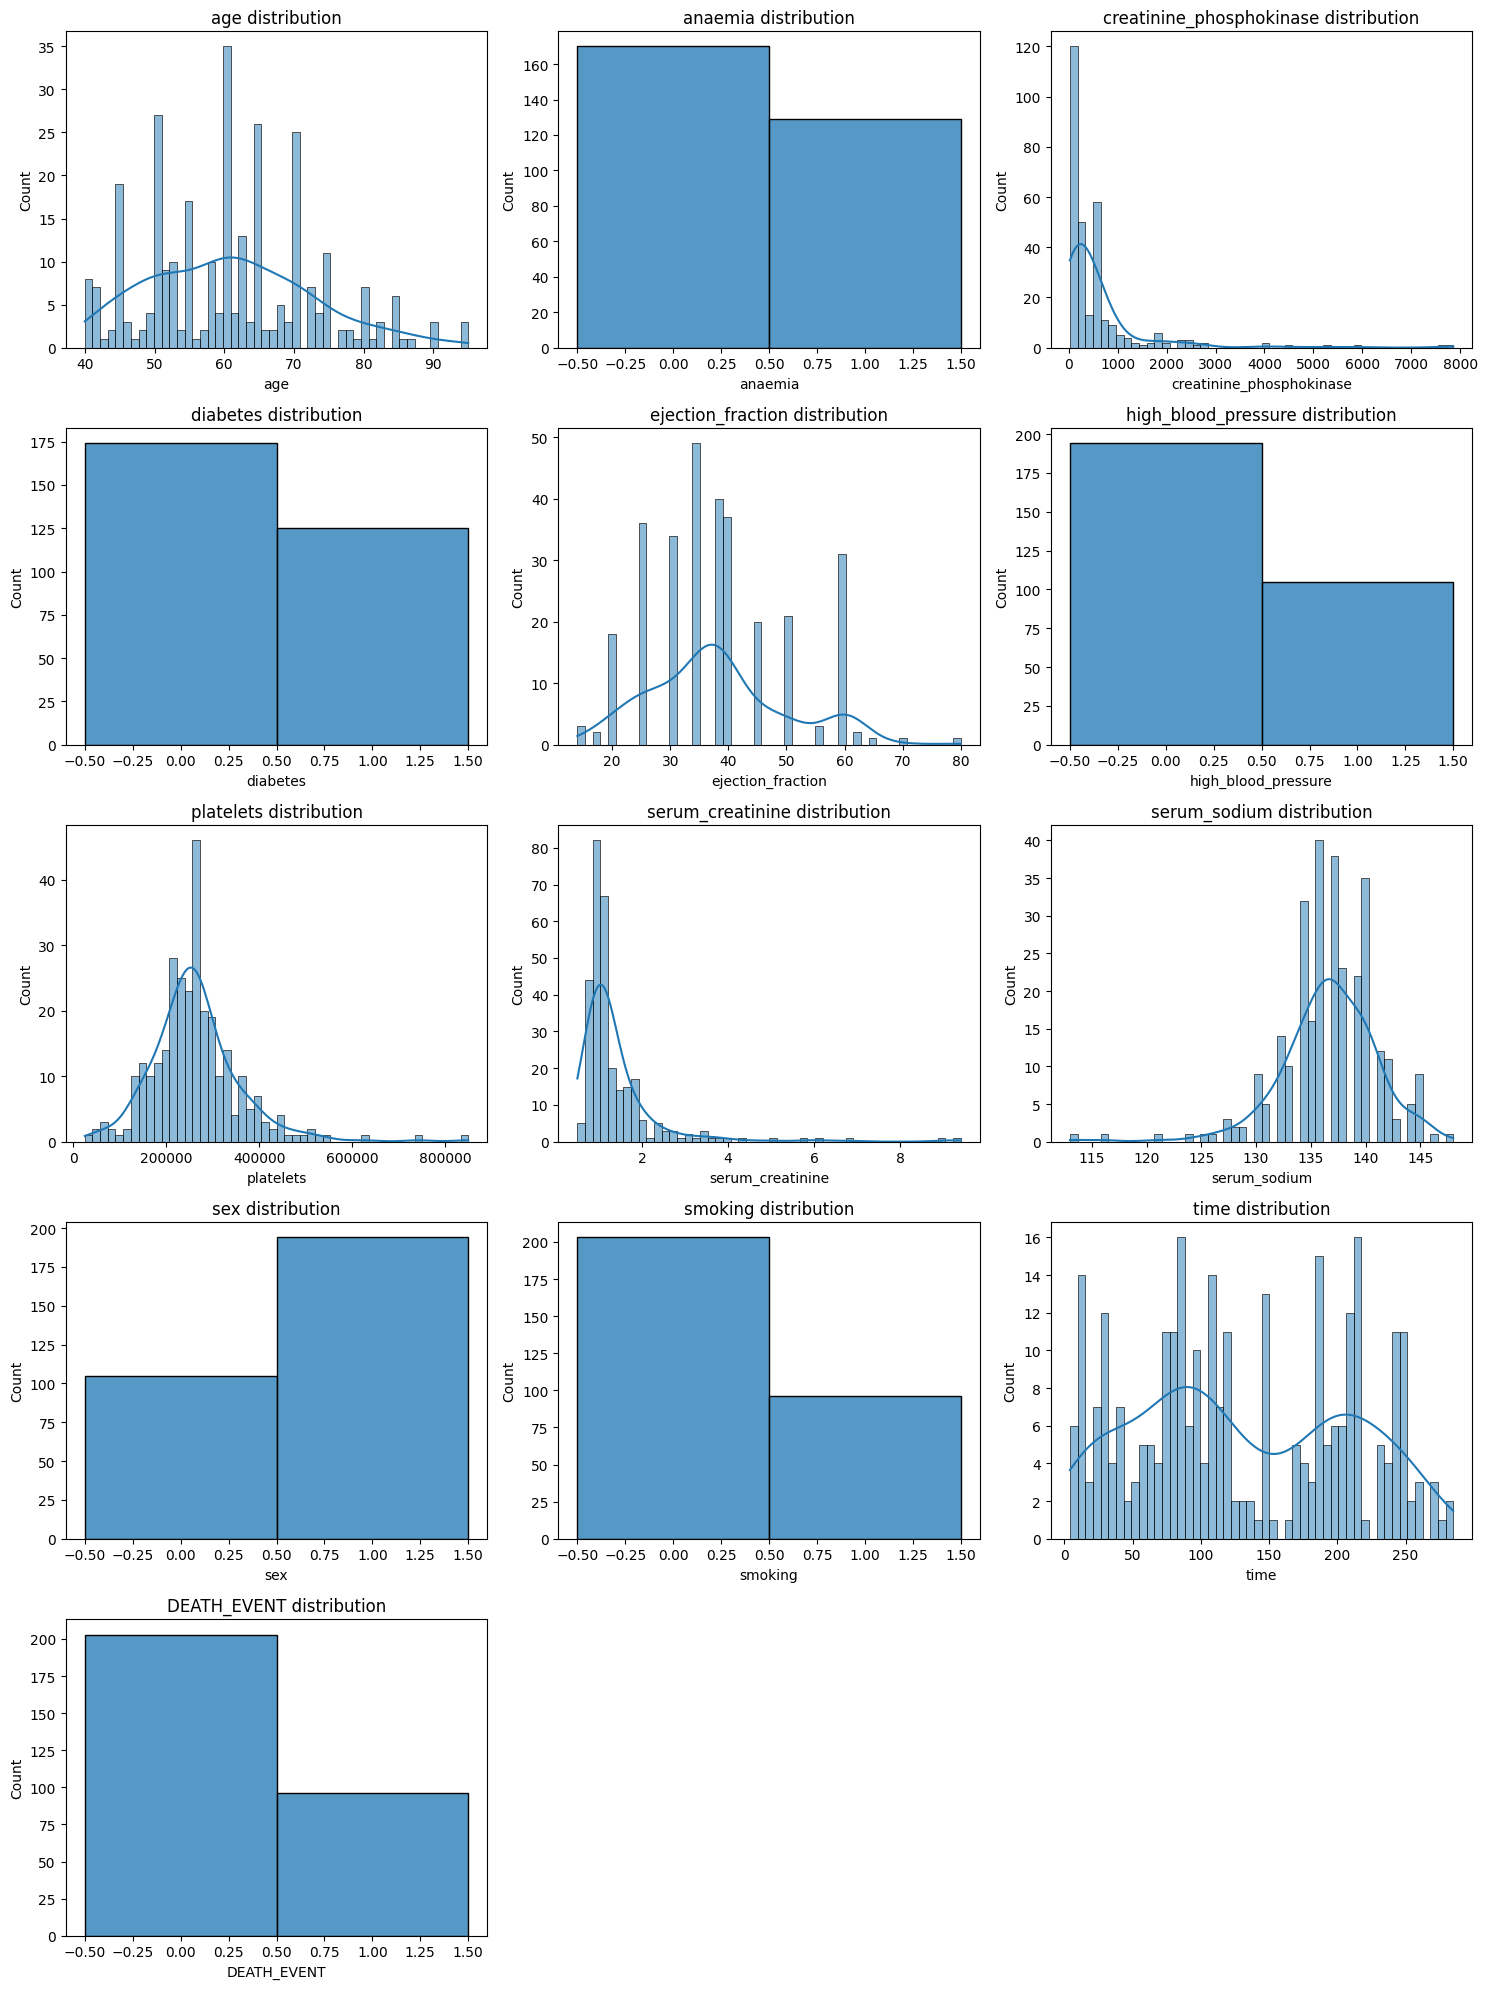

In [11]:
# numerical features
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
n_num = len(num_cols)

if n_num > 0:
    rows = math.ceil(n_num / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        # Count unique values (ignoring NaN)
        nunique = df_clean[col].nunique(dropna=True)
        
        # If binary or low-cardinality numeric feature: use discrete bins
        if nunique <= 10:
            sns.histplot(df_clean[col], discrete=True, ax=axes[i])
        else:
            # Otherwise use a standard histogram with KDE
            sns.histplot(df_clean[col], kde=True, bins=50, ax=axes[i])

        axes[i].set_title(f"{col} distribution")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# for categorical features
cat_cols = df_clean.select_dtypes(include=['object']).columns
n_cat = len(cat_cols)

if n_cat > 0:
    rows = math.ceil(n_cat / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        # Bar plot of value counts
        df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} frequency")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [19]:
data["age"].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])